# Latar Belakang
Sebuah content creator yang berasal dari negara US baru memulai channel youtubenya sedang melakukan riset mengenai video yang sedang trending di youtube. Content creator ini telah mengupload beberapa video di youtube namun video yang telah diupload tersebut tidak memiliki pengunjung yang banyak.


# Pernyataan Masalah
Content creator tersebut ingin mengetahui kira-kira **jenis video apa yang banyak diminati dan disukai oleh orang-orang dan apa saja faktor yang mempengaruhi video agar dapat banyak diminati dan disukai oleh orang-orang**. Content creator ini juga ingin mengetahui hal apa yang sekiranya bisa diharapkan ketika memulai suatu channel seperti **seberapa lama kira-kira waktu yang dibutuhkan agar video yang diupload dapat trending dan persentase jumlah like dan dislike per views dari video yang di-upload**. Tujuan dari penelitian ini dilakukan adalah agar content creator bisa mendapatkan insight yang diperlukan agar dapat membuat video yang diupload banyak diminati dan disukai oleh orang-orang.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data trending youtube video statistics (US Only). Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/datasnaek/youtube-new?sort=published). 

Dataset ini berisi informasi terkait id video, tanggal trending, judul, nama channel, id kategori, waktu publish, tags, views, likes, dislikes, jumlah comment, link thumbnail, fitur disable comment dinyalakan atau tidak, fitur pemberian rating disable atau tidak, video error atau telah dihapus, dan deskripsi. Ada 16 kolom yakni :

* video_id : ID unik untuk tiap video
* trending_date : Tahun, tanggal, bulan ketika video tersebut trending
* title : Judul video
* channel_title : Judul channel dari video tersebut
* category_id : ID unik untuk kategori video tersebut
* publish_time : Waktu video tersebut di-publish
* tags : Tag video tersebut
* views : Jumlah views video tersebut
* likes : Jumlah likes video tersebut
* dislikes : Jumlah dislikes video tersebut
* comments_count : Jumlah comment video tersebut
* thumbnail_link : Link thumbnail video tersebut
* comments_disabled : Keterangan fitur pemberian comment disabled atau tidak
* ratings_disabled : Keterangan fitur pemberian rating disabled atau tidak
* video_error_or_removed : Keterangan apakah video mengalami error atau telah dihapus
* description : Keterangan dari video tersebut

Berikut 5 baris teratas dan terbawah dari dataset USvideos

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [266]:
df = pd.read_csv("USvideos.csv")
display(df.head(), df.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


# Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Proses ini akan memberikan kita informasi mengenai anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penanganan anomali yang dilakukan, akan diberikan penjelasan mengapa langkah tersebut diambil

In [267]:
print(f"Jumlah baris dan kolom pada dataset df ini sendiri adalah {df.shape}")
df.info()

Jumlah baris dan kolom pada dataset df ini sendiri adalah (40949, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-nu

In [268]:
display(df.describe(), df.describe(include = 'object'), df.describe(include = 'bool'))

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


,comments_disabled,ratings_disabled,video_error_or_removed
count,40949,40949,40949
unique,2,2,2
top,False,False,False
freq,40316,40780,40926


In [269]:
item = []
for x in df.columns:
    item.append([x, df[x].nunique(), df[x].unique()])

desc_table = pd.DataFrame(columns = ["Column Name", "Number Of Unique", "Unique Content"], data = item)
desc_table 

,Column Name,Number Of Unique,Unique Content
0,video_id,6351,"[2kyS6SvSYSE, 1ZAPwfrtAFY, 5qpjK5DgCt4, puqaWr..."
1,trending_date,205,"[17.14.11, 17.15.11, 17.16.11, 17.17.11, 17.18..."
2,title,6455,"[WE WANT TO TALK ABOUT OUR MARRIAGE, The Trump..."
3,channel_title,2207,"[CaseyNeistat, LastWeekTonight, Rudy Mancuso, ..."
4,category_id,16,"[22, 24, 23, 28, 1, 25, 17, 10, 15, 27, 26, 2,..."
5,publish_time,6269,"[2017-11-13T17:13:01.000Z, 2017-11-13T07:30:00..."
6,tags,6055,"[SHANtell martin, last week tonight trump pres..."
7,views,40478,"[748374, 2418783, 3191434, 343168, 2095731, 11..."
8,likes,29850,"[57527, 97185, 146033, 10172, 132235, 9763, 15..."
9,dislikes,8516,"[2966, 6146, 5339, 666, 1989, 511, 2445, 778, ..."


In [270]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Dari investigasi diatas, kita bisa melihat bahwa :
* Dataset trending youtube video statistic (US Only) memiliki 40949 baris dan 16 kolom
* Kolom yang memiliki data kosong adalah kolom `description` yakni sebanyak 570 data kosong namun kolom ini tidak dihapus karena dapat dilakukan analisa tambahan mengenai perbedaan views, likes, dan dislikes dari video yang memiliki `description` dan yang tidak memiliki `description`
* Kolom `video_id` berisikan id unik untuk tiap video sehingga data ini tidak relevan dan dapat dihapus
* Kolom `category_id` perlu diubah menjadi nama kategori berdasarkan id unik tersebut
* Kolom `comment_disabled` dan `comment_count` perlu dihapus karena isi dari komen user bisa menjadi hal tidak relevan dengan konten video tersebut
* Kolom `trending_date` berisi dalam format tahun/hari/bulan 
* Dataset ini tidak berisi mengenai ratings sehingga kolom `ratings_disabled` juga dapat dihapus
* Kolom `thumbnail_link` juga dapat dihapus dikarenakan hal ini tidak relevan dengan analisis yang ingin dibuat
* Terdapat perbedaan format data dari kolom `trending_date` dan `publish_time` dimana format data ini perlu disamakan untuk mencari lama waktu yang dibutuhkan oleh video tersebut untuk trending dimana hal ini berfungsi sebagai pemberi insight tambahan bagi content creator untuk melihat sekiranya berapa lama waktu yang dibutuhkan agar video yang dibuatnya dapat trending
* Kolom `video_error_or_removed` yang berisi True akan digunakan sebagai basis penghapusan baris karena kita tidak dapat mengetahui apakah video tersebut mengalami error atau dihapus sehingga diasumsikan bahwa video yang memiliki nilai True dalam kolom video_error_or_removed diasumsikan semuanya di remove karena melanggar suatu kebijakan dalam youtube

Dari keterangan diatas, pertama akan dihapus kolom `video_id`, `comment_disabled`, `comment_count`, `ratings_disabled`, dan `thumbnail_link`.

In [271]:
df_cleaned = df.copy()

In [272]:
df_cleaned = df_cleaned.drop(['video_id', 'comments_disabled', 'comment_count', 'ratings_disabled', 'thumbnail_link'], axis = 1)

Kemudian, perlu dilakukan penghapusan baris yang memiliki nilai True pada kolom `video_error_or_removed`.

In [273]:
df_cleaned['video_error_or_removed'].loc[df_cleaned['video_error_or_removed'] == True].shape

(23,)

Terdapat 23 baris yang memiliki nilai True pada kolom `video_error_or_removed` sehingga akan dilakukan penghapusan pada 23 baris ini.

In [274]:
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['video_error_or_removed'] == True].index)

In [275]:
df_cleaned['video_error_or_removed'].value_counts()

False    40926
Name: video_error_or_removed, dtype: int64

In [276]:
df_cleaned.shape

(40926, 11)

Dari hal ini, telah tervalidasi bahwa penghapusan baris untuk baris yang memiliki nilai True pada kolom `video_error_or_removed` telah berhasil dilakukan karena pengurangan baris sejumlah 23 (dari 40949 baris menjadi 40926 baris) dan sudah tidak ada nilai True pada kolom `video_error_or_removed`. Berhubung penghapusan baris telah berhasil dilakukan, maka kolom `video_error_or_removed` ini sudah tidak diperlukan lagi sehingga dapat dihapus.

In [277]:
df_cleaned = df_cleaned.drop('video_error_or_removed', axis = 1)

In [278]:
#reset_index untuk memperbaiki angka index agar berurutan berhubung penghapusan baris baru selesai dilakukan
df_cleaned = df_cleaned.reset_index(drop = True)

In [279]:
for i in df_cleaned.columns:
    print(f"Duplicated in {i} columns : {df[i].duplicated().sum()}")

Duplicated in trending_date columns : 40744
Duplicated in title columns : 34494
Duplicated in channel_title columns : 38742
Duplicated in category_id columns : 40933
Duplicated in publish_time columns : 34680
Duplicated in tags columns : 34894
Duplicated in views columns : 471
Duplicated in likes columns : 11099
Duplicated in dislikes columns : 32433
Duplicated in description columns : 34047


Dari semua kolom yang memiliki data duplikat ini, hal yang memerlukan perhatian lebih merupakan kolom `title` karena memang sewajarnya terdapat value yang sama untuk kolom lainnya. Kolom `title` ini sendiri perlu diperhatikan ketika melakukan analisis seperti jumlah views dalam video dengan judul tertentu, perlu diberikan sebuah perlakuan tambahan namun secara keseluruhan, **data duplikat ini dapat dipertahankan karena tidak akan mengganggu hasil analisa yang ada selama diberikan perlakuan yang tepat (tanpa menghapus data duplikat)**.

In [280]:
display(df_cleaned.tail())

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description
40921,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,The Cat Who Caught the Laser - Aaron's Animals
40922,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,NaN
40923,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,I had so much fun transforming Safiyas hair in...
40924,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,How Black Panther Should Have EndedWatch More ...
40925,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,Call of Duty: Black Ops 4 Multiplayer raises t...


# Penempatan Category Berdasarkan Category ID
Untuk penempatan `category_id`, perlu diakses US_category_id.json dengan link yang telah dilampirkan diatas yakni [link ini](https://www.kaggle.com/datasets/datasnaek/youtube-new?sort=published). Langkah pertama yang perlu diambil adalah melakukan ekstraksi data dari US_category_id.json dimana hal ini akan dijabarkan dibawah.

In [281]:
category = pd.read_json('US_category_id.json')

In [282]:
category_id = []
category_title = []
for i in category['items']:
    print(i['id'], i['snippet']['title'])
    category_id.append(i['id'])
    category_title.append(i['snippet']['title'])

category_id = pd.Series(category_id)
category_title = pd.Series(category_title)

1 Film & Animation
2 Autos & Vehicles
10 Music
15 Pets & Animals
17 Sports
18 Short Movies
19 Travel & Events
20 Gaming
21 Videoblogging
22 People & Blogs
23 Comedy
24 Entertainment
25 News & Politics
26 Howto & Style
27 Education
28 Science & Technology
29 Nonprofits & Activism
30 Movies
31 Anime/Animation
32 Action/Adventure
33 Classics
34 Comedy
35 Documentary
36 Drama
37 Family
38 Foreign
39 Horror
40 Sci-Fi/Fantasy
41 Thriller
42 Shorts
43 Shows
44 Trailers


In [283]:
dict_category = {'category_id':category_id, 'category':category_title}
df_category = pd.DataFrame(data = dict_category)

In [284]:
df_category

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Ekstraksi data telah berhasil dilakukan dan telah dibuat dataframe untuk menampung nama kategori berdasarkan id dari kategori tersebut. Langkah berikutnya adalah untuk melakukan penempatan pada `df_cleaned` untuk nama dari kategori berdasarkan id dari kategori tersebut.

In [285]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40926 entries, 0 to 40925
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   trending_date  40926 non-null  object
 1   title          40926 non-null  object
 2   channel_title  40926 non-null  object
 3   category_id    40926 non-null  int64 
 4   publish_time   40926 non-null  object
 5   tags           40926 non-null  object
 6   views          40926 non-null  int64 
 7   likes          40926 non-null  int64 
 8   dislikes       40926 non-null  int64 
 9   description    40358 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.1+ MB


In [286]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  32 non-null     object
 1   category     32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


Terlihat bahwa `category_id` pada df_cleaned dan df_category memiliki tipe yang berbeda yakni object dan int64 sehingga perlu disamakan terlebih dahulu untuk dilakukan penempatan.

In [287]:
df_category['category_id'] = df_category['category_id'].astype('int64')

In [288]:
df_cleaned = pd.merge(df_cleaned, df_category, on = 'category_id')

In [289]:
df_cleaned.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,description,category
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,Molly is an god damn amazing human and she cha...,People & Blogs
4,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,I found this online dollar store called ShopMi...,People & Blogs


In [290]:
print(f"Number Of Uniques category : {df_cleaned['category'].nunique()}")
print(f"Number Of Uniques category_id : {df_cleaned['category_id'].nunique()}")

Number Of Uniques category : 16
Number Of Uniques category_id : 16


Dapat dilihat bahwa penempatan telah berhasil dilakukan dan validasi dilakukan dengan memperlihatkan number of unique dimana ditemukan number of uniques dari `category` dan `category_id` menghasilkan nilai yang sama sehingga dari hal ini, penempatan telah divalidasi sehingga kolom `category_id` dapat dihapus karena tidak dibutuhkan lagi.

In [291]:
df_cleaned = df_cleaned.drop('category_id', axis = 1)

In [292]:
df_cleaned.columns

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'description', 'category'],
      dtype='object')

# Penyamaan format trending_date dan publish_time
Penyamaan format ini berfungsi untuk mencari berapa lama waktu yang dibutuhkan dari video tersebut untuk trending dan memberikan insight tambahan untuk content creator agar dapat mengestimasi berapa lama waktu yang sekiranya dibutuhkan dari suatu video untuk trending

In [293]:
df_cleaned[['trending_date', 'publish_time']]

,trending_date,publish_time
0,17.14.11,2017-11-13T17:13:01.000Z
1,17.14.11,2017-04-21T06:47:32.000Z
2,17.14.11,2017-11-11T15:00:03.000Z
3,17.14.11,2017-11-11T18:08:04.000Z
4,17.14.11,2017-11-11T01:19:33.000Z
...,...,...
40921,18.02.06,2018-05-10T21:01:22.000Z
40922,18.03.06,2018-05-10T21:01:22.000Z
40923,18.04.06,2018-05-10T21:01:22.000Z
40924,18.05.06,2018-05-10T21:01:22.000Z


In [294]:
from datetime import datetime

In [295]:
trending_date = []
for i in df_cleaned['trending_date']:
    trending_date.append(i)

In [296]:
for i in range(len(trending_date)):
    parsed_trending_date = datetime.strptime(trending_date[i], '%y.%d.%m')
    formatted_trending_date = parsed_trending_date.strftime('%Y-%m-%d')
    trending_date[i] = formatted_trending_date

In [297]:
df_cleaned['trending_date'] = trending_date

In [298]:
df_cleaned['trending_date']

0        2017-11-14
1        2017-11-14
2        2017-11-14
3        2017-11-14
4        2017-11-14
            ...    
40921    2018-06-02
40922    2018-06-03
40923    2018-06-04
40924    2018-06-05
40925    2018-06-06
Name: trending_date, Length: 40926, dtype: object

In [299]:
publish_time = []
for i in df_cleaned['publish_time']:
    publish_time.append(i)

In [300]:
for i in range(len(publish_time)):
    parsed_publish_time = datetime.strptime(publish_time[i], '%Y-%m-%dT%H:%M:%S.%fZ')
    formatted_publish_time = parsed_publish_time.strftime('%Y-%m-%d')
    publish_time[i] = formatted_publish_time

In [301]:
df_cleaned['publish_time'] = publish_time

In [302]:
df_cleaned['publish_time']

0        2017-11-13
1        2017-04-21
2        2017-11-11
3        2017-11-11
4        2017-11-11
            ...    
40921    2018-05-10
40922    2018-05-10
40923    2018-05-10
40924    2018-05-10
40925    2018-05-10
Name: publish_time, Length: 40926, dtype: object

In [303]:
df_cleaned.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,description,category
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,"cute|""cats""|""thai""|""eggs""",98966,2486,184,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,Molly is an god damn amazing human and she cha...,People & Blogs
4,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,wearing online dollar store makeup for a week|...,2744430,115426,1110,I found this online dollar store called ShopMi...,People & Blogs


# Data Analysis
Dalam melakukan analisis pertama dilengkapi tabel ini tersebut dengan menambahkan kolom baru yakni `time_needed_for_trending` dimana kolom ini berisi mengenai lama waktu yang dibutuhkan untuk suatu video dari di-publish sampai menjadi trending.

In [304]:
A = pd.to_datetime(df_cleaned['trending_date'])
B = pd.to_datetime(df_cleaned['publish_time'])

In [305]:
df_cleaned['time_needed_for_trending'] = A - B

In [306]:
df_cleaned.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,description,category,time_needed_for_trending
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1 days
1,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,"cute|""cats""|""thai""|""eggs""",98966,2486,184,Kittens come out of the eggs in a Thai commerc...,People & Blogs,207 days
2,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,3 days
3,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,Molly is an god damn amazing human and she cha...,People & Blogs,3 days
4,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,wearing online dollar store makeup for a week|...,2744430,115426,1110,I found this online dollar store called ShopMi...,People & Blogs,3 days


Dari hal ini, maka semua kolom yang dibutuhkan untuk menganalisa telah lengkap dan tahap analisa dapat dimulai

# Exploratory Data Analysis Untuk Persentase Likes & Dislikes Per Views Beserta Kategori Yang Paling Diminati, Disukai, dan Tidak Disukai

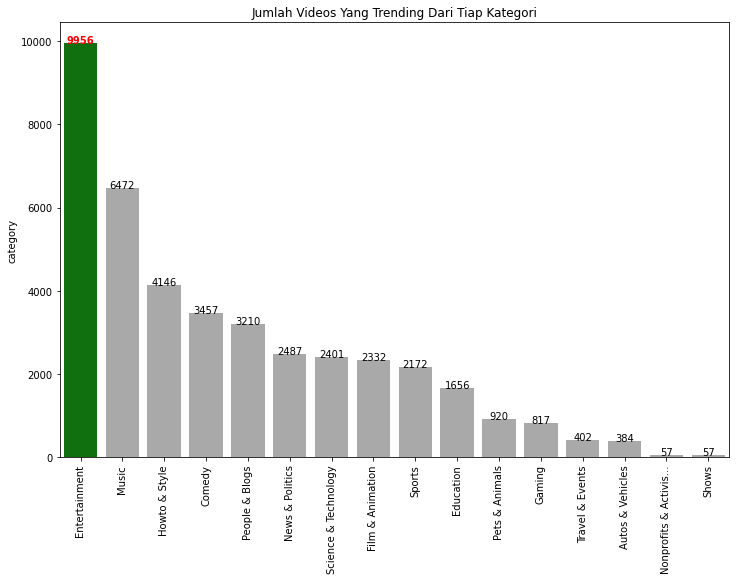

In [307]:
category = pd.DataFrame(df_cleaned['category'].value_counts().round(3))
max_color = 'red'
colors = ['darkgrey' if v != category['category'].max() else 'green' for i, v in enumerate(category['category'])]
def format_xticks(label, limit=20):
    if len(label) > limit:
        return label[:limit] + '...'
    else:
        return label
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=category, x=category.index, y='category', palette=colors)
ax.set_xticklabels([format_xticks(label.get_text()) for label in ax.get_xticklabels()], 
                   rotation=90, fontsize=10)
plt.title('Jumlah Videos Yang Trending Dari Tiap Kategori')

for i, v in enumerate(category['category']):
    if v == category['category'].max():
        ax.text(i, v, f"{v}", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v}", ha='center')

plt.show()

In [308]:
print(f"{df_cleaned['category'].value_counts(normalize = True).round(3) * 100}")

Entertainment            24.3
Music                    15.8
Howto & Style            10.1
Comedy                    8.4
People & Blogs            7.8
News & Politics           6.1
Science & Technology      5.9
Film & Animation          5.7
Sports                    5.3
Education                 4.0
Pets & Animals            2.2
Gaming                    2.0
Travel & Events           1.0
Autos & Vehicles          0.9
Nonprofits & Activism     0.1
Shows                     0.1
Name: category, dtype: float64


Dari hal ini, dapat dilihat bahwa kategori video yang paling banyak trending adalah **entertainment yakni sebesar 24,3% dari 40926 video yang trending di dataset ini**. 

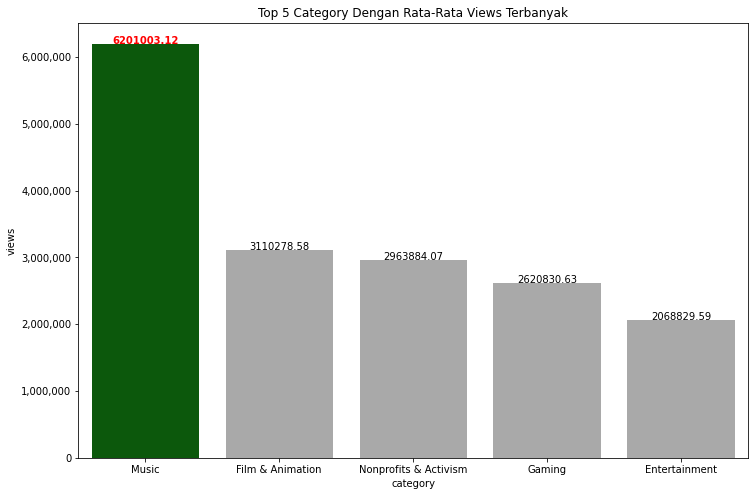

In [309]:
Top5_category_diminati = pd.DataFrame(df_cleaned.groupby('category')['views'].mean().round(2).sort_values(ascending=False).head())
colors = ['darkgrey' if v != Top5_category_diminati['views'].max() else 'darkgreen' for i, v in enumerate(Top5_category_diminati['views'])]

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=Top5_category_diminati, x=Top5_category_diminati.index, y='views', palette=colors)
plt.title('Top 5 Category Dengan Rata-Rata Views Terbanyak')
def format_yticks(value, _):
    return '{:,.0f}'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i, v in enumerate(Top5_category_diminati['views']):
    if v == Top5_category_diminati['views'].max():
        ax.text(i, v, f"{v}", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v}", ha='center')

plt.show()

Dilakukan eksplorasi lebih lanjut dan dapat dilihat bahwa dari video yang trending, kategori music, film & animation, nonprofits & activism, gaming, dan entertainment memiliki rata-rata views yang paling banyak. Angka ini merepresentasikan bahwa 5 kategori diatas merupakan 5 kategori yang paling diminati dari video yang trending di youtube (US only).

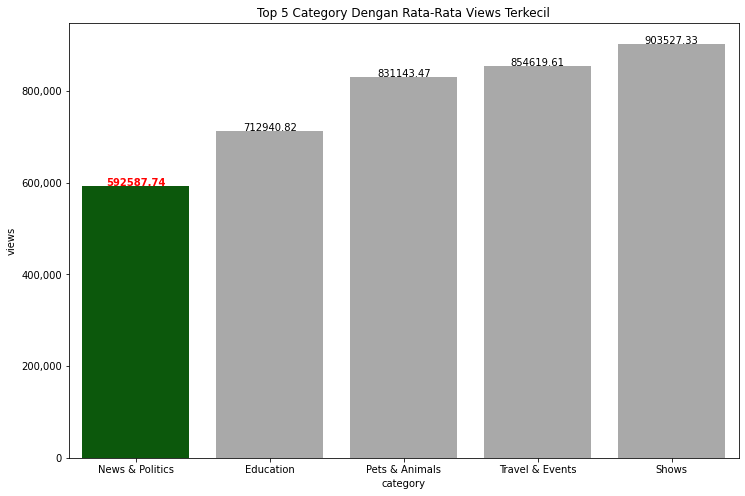

In [310]:
Top5_category_tidakdiminati = pd.DataFrame(df_cleaned.groupby('category')['views'].mean().round(2).sort_values(ascending=True).head())
colors = ['darkgrey' if v != Top5_category_tidakdiminati['views'].min() else 'darkgreen' for i, v in enumerate(Top5_category_tidakdiminati['views'])]

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=Top5_category_tidakdiminati, x=Top5_category_tidakdiminati.index, y='views', palette=colors)
plt.title('Top 5 Category Dengan Rata-Rata Views Terkecil')
def format_yticks(value, _):
    return '{:,.0f}'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i, v in enumerate(Top5_category_tidakdiminati['views']):
    if v == Top5_category_tidakdiminati['views'].min():
        ax.text(i, v, f"{v}", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v}", ha='center')


Sedangkan kategori news & politics, education, pets & animals, travel & events, dan shows memiliki rata-rata views yang paling sedikit. Angka ini merepresentasikan bahwa 5 kategori diatas merupakan 5 kategori yang paling tidak diminati dari video yang trending di youtube (US only).

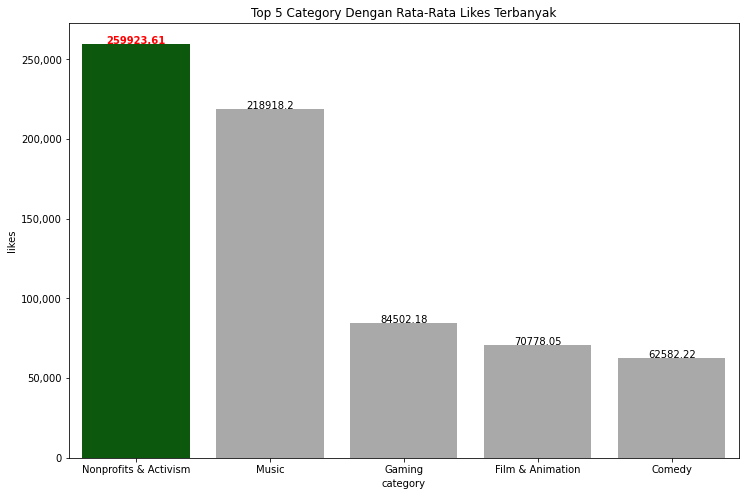

In [311]:
Top5_category_disukai = pd.DataFrame(df_cleaned.groupby('category')['likes'].mean().round(2).sort_values(ascending=False).head())
colors = ['darkgrey' if v != Top5_category_disukai['likes'].max() else 'darkgreen' for i, v in enumerate(Top5_category_disukai['likes'])]

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=Top5_category_disukai, x=Top5_category_disukai.index, y='likes', palette=colors)
plt.title('Top 5 Category Dengan Rata-Rata Likes Terbanyak')
def format_yticks(value, _):
    return '{:,.0f}'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i, v in enumerate(Top5_category_disukai['likes']):
    if v == Top5_category_disukai['likes'].max():
        ax.text(i, v, f"{v}", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v}", ha='center')

plt.show()

Dari hasil ini, dapat dilihat bahwa kategori nonprofits & activism, music, gaming, film & animation, dan comedy merupakan 5 kategori yang memiliki rata-rata like terbesar dari video yang trending di youtube (US only).

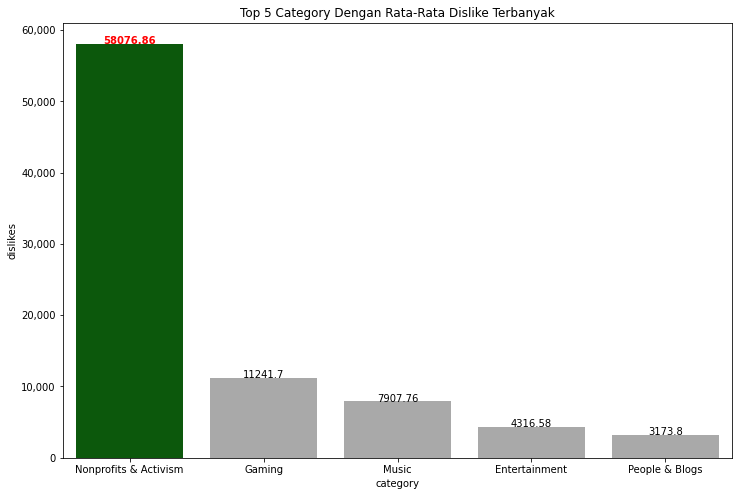

In [312]:
Top5_category_tidakdisukai = pd.DataFrame(df_cleaned.groupby('category')['dislikes'].mean().round(2).sort_values(ascending=False).head())
colors = ['darkgrey' if v != Top5_category_tidakdisukai['dislikes'].max() else 'darkgreen' for i, v in enumerate(Top5_category_tidakdisukai['dislikes'])]

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=Top5_category_tidakdisukai, x=Top5_category_tidakdisukai.index, y='dislikes', palette=colors)
plt.title('Top 5 Category Dengan Rata-Rata Dislike Terbanyak')
def format_yticks(value, _):
    return '{:,.0f}'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i, v in enumerate(Top5_category_tidakdisukai['dislikes']):
    if v == Top5_category_tidakdisukai['dislikes'].max():
        ax.text(i, v, f"{v}", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v}", ha='center')

plt.show()

Dari hasil ini, dapat dilihat bahwa kategori nonprofits & activism, gaming, music, entertainment, dan people & blogs merupakan 5 kategori yang memiliki rata-rata dislike terbesar dari video yang trending di youtube (US only).

# Keanehan yang ditemukan
Muncul sebuah pertanyaan dari analisa yang dijabarkan diatas yakni :
* Mengapa kategori nonprofits & activism, gaming, dan music memiliki jumlah rata-rata like dan dislike terbesar?
* Kategori nonprofits & activism, gaming, music, dan entertainment memiliki jumlah rata-rata dislike terbesar namun keempat kategori ini termasuk kategori yang paling diminati (memiliki rata-rata jumlah views terbesar).
* Kategori nonprofits & activism, music, gaming, dan film & animation memiliki jumlah rata-rata like terbesar namun keempat kategori ini termasuk kategori yang paling diminati (memiliki rata-rata jumlah views terbesar).

Dari hal yang disampaikan tersebut, maka pertanyaan besar yang muncul adalah :
* Apakah terdapat suatu hubungan dari kolom `likes`, `dislikes`, dan `views`?


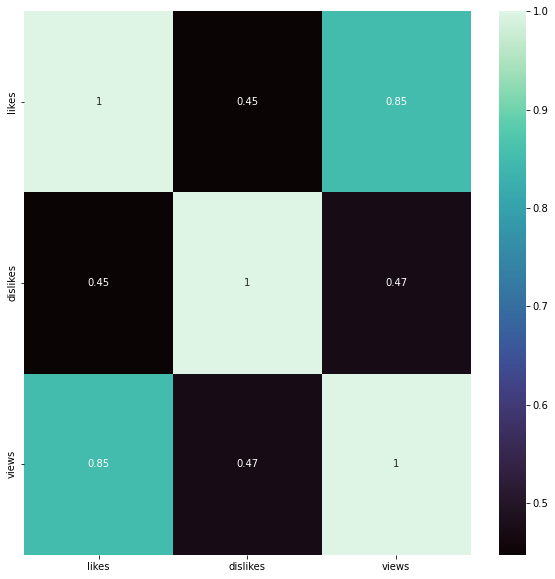

In [313]:
plt.figure(figsize = (10,10))
sns.heatmap(df[['likes', 'dislikes', 'views']].corr(), annot = True, cmap = 'mako')
plt.show()

Dari korelasi ini, ditetapkan 0,5 sebagai nilai tengah dan dapat dilihat bahwa `dislikes` memiliki korelasi positif yang kurang kuat (dibawah 0,5) dengan `views` dan `likes` sedangkan `likes` memiliki korelasi positif yang sangat kuat dengan `views` (diatas 0,5 dan mendekati 1) dan korelasi positif yang kurang kuat dengan `dislikes` (dibawah 0,5). Hal ini mengartikan bahwa `views`, `likes`, dan `dislikes` memiliki hubungan berbentuk korelasi positif antara satu sama lain sehingga semakin tinggi salah satu angka dari ketiga kolom tersebut, maka semakin tinggi juga angka dari kedua kolom lainnya. Untuk lebih jelas, contohnya adalah semakin tinggi angka dalam kolom `views`, maka angka dalam kolom `likes` akan semakin tinggi secara signifikan dan angka dalam kolom `dislikes` akan semakin tinggi namun tidak secara signifikan. 

In [314]:
total_views = df_cleaned['views'].sum()
total_likes = df_cleaned['likes'].sum()
total_dislikes = df_cleaned['dislikes'].sum()

In [315]:
total_views

96633657080

In [316]:
total_likes

3040025478

In [317]:
total_dislikes

151944975

In [318]:
persentase_like_per_view = (total_likes / total_views) * 100 
persentase_dislike_per_view = (total_dislikes / total_views) * 100 

In [319]:
print(f"Persentase Like Per Views : {persentase_like_per_view.round(2)} %")
print(f"Persentase Dislike Per Views : {persentase_dislike_per_view.round(2)} %")

Persentase Like Per Views : 3.15 %
Persentase Dislike Per Views : 0.16 %


Dari hasil ini, ditemukan bahwa persentase like per views adalah 3,15 % dan persentase dislike per views adalah 0,16 % dimana angka ini juga membuktikan hasil uji korelasi yang dilakukan diatas. Kesimpulan yang dapat diambil dari hal ini adalah **content creator dapat mengambil jumlah views sebagai fokus utama terlebih dahulu karena semakin banyak jumlah views, peningkatan jumlah like akan lebih besar dibandingkan peningkatan jumlah dislike dari suatu video**

# Exploratory Data Analysis Untuk Seberapa Lama Waktu Yang Dibutuhkan Dari Suatu Video Untuk Trending

In [320]:
time_needed_for_trending_days = df_cleaned['time_needed_for_trending'].dt.total_seconds() / (24 * 3600)

In [321]:
print(f"Waktu rata-rata untuk suatu video trending adalah {int(time_needed_for_trending_days.mean().round(0))} hari")

Waktu rata-rata untuk suatu video trending adalah 17 hari


Dari hal ini, ditemukan lama waktu rata-rata untuk suatu video trending adalah 17 hari namun angka ini merupakan rata-rata dari semua kategori. Untuk membantu content creator dapat menemukan kategori yang sekiranya memiliki waktu paling cepat untuk trending, perlu dilakukan eksplorasi tambahan.

In [322]:
Visualization_Category_Trending = pd.DataFrame(df_cleaned.groupby('category')['time_needed_for_trending'].mean().dt.days)

In [323]:
Top_Five_Fastest_Category_For_Trending = df_cleaned.groupby('category')['time_needed_for_trending'].mean().dt.days.sort_values(ascending=True).head()

In [324]:
Visualization_Top_Five_Fastest_For_Trending = pd.DataFrame(Top_Five_Fastest_Category_For_Trending)

In [325]:
cols = ['orange' if x in Visualization_Top_Five_Fastest_For_Trending.index else 'grey' for x in Visualization_Category_Trending.index]

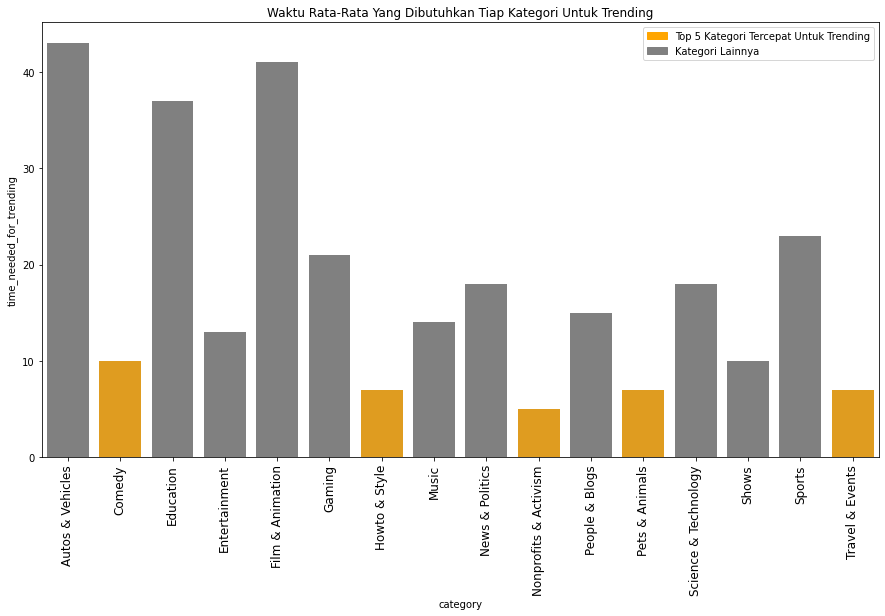

In [326]:
import matplotlib.patches as mpatches

plt.figure(figsize = (15,8))
ax = sns.barplot(data = Visualization_Category_Trending, x = Visualization_Category_Trending.index, y = 'time_needed_for_trending', palette = cols)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title("Waktu Rata-Rata Yang Dibutuhkan Tiap Kategori Untuk Trending")
orange_patch = mpatches.Patch(color='orange', label='Top 5 Kategori Tercepat Untuk Trending')
grey_patch = mpatches.Patch(color='grey', label='Kategori Lainnya')
plt.legend(handles=[orange_patch, grey_patch], loc='upper right')
plt.show()

In [327]:
df_cleaned.groupby('category')['time_needed_for_trending'].mean().dt.floor('D').sort_values(ascending=True).head()

category
Nonprofits & Activism    5 days
Howto & Style            7 days
Pets & Animals           7 days
Travel & Events          7 days
Comedy                  10 days
Name: time_needed_for_trending, dtype: timedelta64[ns]

Dapat dilihat bahwa kategori **comedy, howto & style, nonprofits & activism, pets & animals, dan travel & events** memiliki waktu rata-rata tercepat untuk trending. Dari kelima kategori tersebut, kategori **nonprofits & activism** memiliki waktu rata-rata tercepat untuk trending yakni 5 hari.

# Exploratory Data Analysis Untuk Video Yang Memiliki Description & Yang Tidak

In [328]:
df_cleaned.columns

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'description', 'category',
       'time_needed_for_trending'],
      dtype='object')

In [329]:
df_cleaned['description'].fillna("No Description", inplace = True)

Dapat dilihat bahwa jumlah data kosong pada kolom `description` mengalami penurunan dari 570 menjadi 568. Hal ini disebabkan karena penghapusan baris yang sebelumnya telah dilakukan. Untuk data kosong, karena akan digunakan untuk analisa pembanding dari video trending yang tidak ada `description` dan ada `description`. 

In [330]:
df_cleaned.loc[df_cleaned['description'] == "No Description"]['views'].mean().round(2)

1654345.73

In [331]:
df_cleaned.loc[df_cleaned['description'] != "No Description"]['views'].mean().round(2)

2371128.12

Dari hasil ini, dapat dilihat bahwa data yang tidak memiliki deskripsi cenderung memiliki rata-rata jumlah views yang lebih rendah dibandingkan data yang memiliki deskripsi namun hal ini perlu dilakukan eksplorasi lagi dengan uji statistik agar kita dapat mengetahui apakah kolom `description` ini benar-benar berpengaruh terhadap jumlah views. Pertama, akan dilakukan uji normalitas terlebih dahulu terhadap kolom `views` dan `description` untuk mengetahui uji parametrik atau non parametrik yang harus diterapkan.

In [332]:
#Pemisahan ini berfungsi untuk uji statistik yang akan diterapkan (perbedaan jumlah views dari video yang memiliki description dan yang tidak)
views_with_no_description = df_cleaned.loc[df_cleaned['description'] == "No Description"]['views']
views_with_description = df_cleaned.loc[df_cleaned['description'] != "No Description"]['views']

In [333]:
from scipy.stats import normaltest
stats, pval = normaltest(views_with_no_description)
print(pval)
if pval > 0.05:
    print("Berdistribusi Normal")
else:
    print("Tidak Normal")

5.902291262413715e-130
Tidak Normal


In [334]:
stats, pval = normaltest(views_with_description)
print(pval)
if pval > 0.05:
    print("Berdistribusi Normal")
else:
    print("Tidak Normal")

0.0
Tidak Normal


In [335]:
#Uji Mann Whitney karena kedua views_with_description dan views_with_no_description tidak berdistribusi normal
from scipy.stats import mannwhitneyu 
stats, pval = mannwhitneyu(views_with_description, views_with_no_description)
print(pval)
if pval <= 0.05:
    print('Tolak H0')
else:
    print("Gagal menolak H0")

7.0344676835737514e-40
Tolak H0


Dari hal ini, maka didapatkan bahwa H0 ditolak dimana hal ini mengartikan bahwa terdapat perbedaan signifikan antara jumlah views dari video yang memiliki description dan yang tidak. Kesimpulan yang dapat diambil dari hal ini adalah **pemberian description pada video mempengaruhi jumlah views yang dapat diperoleh**.

# Exploratory Data Analysis Untuk Channel Title

In [336]:
df_cleaned.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,description,category,time_needed_for_trending
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,SHANtell martin,748374,57527,2966,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1 days
1,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,"cute|""cats""|""thai""|""eggs""",98966,2486,184,Kittens come out of the eggs in a Thai commerc...,People & Blogs,207 days
2,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,3 days
3,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,Molly is an god damn amazing human and she cha...,People & Blogs,3 days
4,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,wearing online dollar store makeup for a week|...,2744430,115426,1110,I found this online dollar store called ShopMi...,People & Blogs,3 days


In [337]:
df_cleaned.groupby('channel_title')['title'].count().sort_values(ascending = False).head(10)

channel_title
ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Netflix                                   193
Vox                                       193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: title, dtype: int64

In [338]:
df_cleaned.groupby('channel_title')['views'].sum().sort_values(ascending = False).head(10)

channel_title
ChildishGambinoVEVO            3758488765
ibighit                        2235906679
Dude Perfect                   1870085178
Marvel Entertainment           1808998971
ArianaGrandeVevo               1576959172
MalumaVEVO                     1551515831
jypentertainment               1486972132
Sony Pictures Entertainment    1432374398
FoxStarHindi                   1238609854
BeckyGVEVO                     1182971286
Name: views, dtype: int64

In [339]:
df_cleaned.groupby('channel_title')['likes'].sum().sort_values(ascending = False).head(10)

channel_title
ibighit                 199247121
ChildishGambinoVEVO      96700818
Dude Perfect             60275557
Marvel Entertainment     55873344
ArianaGrandeVevo         52170970
jypentertainment         44900910
TaylorSwiftVEVO          39292840
Ed Sheeran               39279211
ZaynVEVO                 31695245
Logan Paul Vlogs         31545290
Name: likes, dtype: int64

In [340]:
df_cleaned.groupby('channel_title')['dislikes'].sum().sort_values(ascending = False).head(10)

channel_title
Logan Paul Vlogs       13847251
YouTube Spotlight      10924092
ChildishGambinoVEVO     6054434
Call of Duty            5644083
ibighit                 3467306
jypentertainment        2482131
TaylorSwiftVEVO         2127542
ArianaGrandeVevo        1931230
MalumaVEVO              1757948
KatyPerryVEVO           1669622
Name: dislikes, dtype: int64

Dari eksplorasi data awal, ditemukan suatu menarik yakni **top 10 channel yang memiliki jumlah video yang trending, jumlah views, jumlah likes, dan jumlah dislikes memiliki hasil berupa channel yang berbeda-beda untuk keempat hal tersebut**. Pada tahap sebelumnya, sempat disinggung mengenai rasio jumlah likes dan dislikes per view yang ada. Hal ini akan dijadikan sebagai patokan utama untuk memperlihatkan channel mana yang memiliki rasio jumlah likes / views dan jumlah dislikes / views terbanyak.

In [341]:
df_cleaned['ratio_likes_per_view (percentage)'] = df_cleaned['likes'] / df_cleaned['views'] * 100
df_cleaned['ratio_dislikes_per_view (percentage)'] = df_cleaned['dislikes'] / df_cleaned['views'] * 100

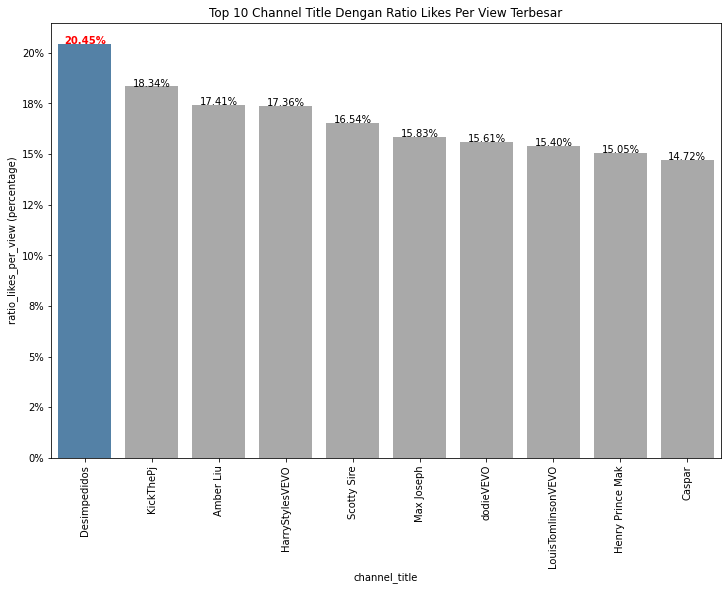

In [342]:
Top10_channel_title_ratio_like_per_view = pd.DataFrame(df_cleaned.groupby('channel_title')['ratio_likes_per_view (percentage)'].mean().sort_values(ascending = False).head(10).round(2))
colors = ['darkgrey' if v != Top10_channel_title_ratio_like_per_view['ratio_likes_per_view (percentage)'].max() else 'steelblue' for i, v in enumerate(Top10_channel_title_ratio_like_per_view['ratio_likes_per_view (percentage)'])]

def format_xticks(label, limit=20):
    if len(label) > limit:
        return label[:limit] + '...'
    else:
        return label
    
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=Top10_channel_title_ratio_like_per_view, x=Top10_channel_title_ratio_like_per_view.index, y='ratio_likes_per_view (percentage)', palette=colors)
plt.title('Top 10 Channel Title Dengan Ratio Likes Per View Terbesar')
ax.set_xticklabels([format_xticks(label.get_text()) for label in ax.get_xticklabels()], 
                   rotation=90, fontsize=10)
def format_yticks(value, _):
    return '{:,.0f}%'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i, v in enumerate(Top10_channel_title_ratio_like_per_view['ratio_likes_per_view (percentage)']):
    if v == Top10_channel_title_ratio_like_per_view['ratio_likes_per_view (percentage)'].max():
        ax.text(i, v, f"{v:.2f}%", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v:.2f}%", ha='center')

plt.show()

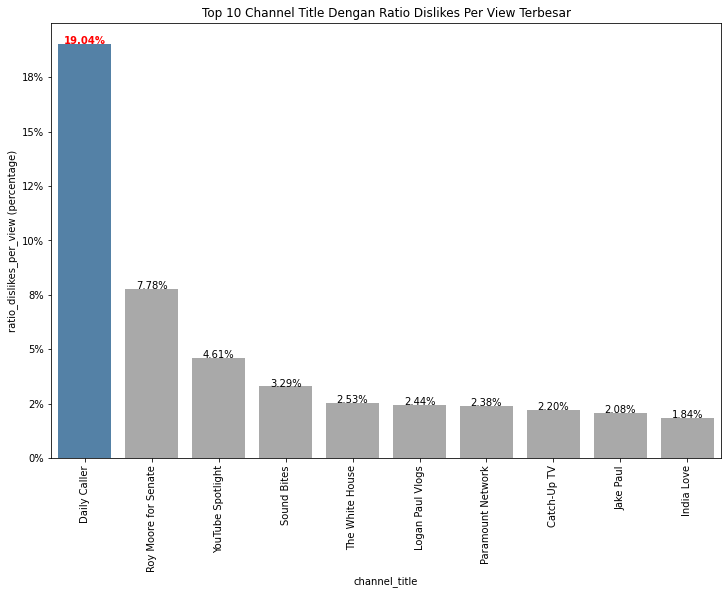

In [343]:
Top10_channel_title_ratio_dislike_per_view = pd.DataFrame(df_cleaned.groupby('channel_title')['ratio_dislikes_per_view (percentage)'].mean().sort_values(ascending = False).head(10).round(2))
colors = ['darkgrey' if v != Top10_channel_title_ratio_dislike_per_view['ratio_dislikes_per_view (percentage)'].max() else 'steelblue' for i, v in enumerate(Top10_channel_title_ratio_dislike_per_view['ratio_dislikes_per_view (percentage)'])]

def format_xticks(label, limit=20):
    if len(label) > limit:
        return label[:limit] + '...'
    else:
        return label
    
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=Top10_channel_title_ratio_dislike_per_view, x=Top10_channel_title_ratio_dislike_per_view.index, y='ratio_dislikes_per_view (percentage)', palette=colors)
plt.title('Top 10 Channel Title Dengan Ratio Dislikes Per View Terbesar')
ax.set_xticklabels([format_xticks(label.get_text()) for label in ax.get_xticklabels()], 
                   rotation=90, fontsize=10)
def format_yticks(value, _):
    return '{:,.0f}%'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i, v in enumerate(Top10_channel_title_ratio_dislike_per_view['ratio_dislikes_per_view (percentage)']):
    if v == Top10_channel_title_ratio_dislike_per_view['ratio_dislikes_per_view (percentage)'].max():
        ax.text(i, v, f"{v:.2f}%", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v:.2f}%", ha='center')

Dari hal ini, dapat dilihat bahwa nilai yang didapatkan dari top 10 channel dengan nilai `ratio_likes_per_view (percentage)` dan `ratio_dislikes_per_view (percentage)` yang memiliki perbedaan jauh dari rasio likes per view dan rasio dislikes per view yang ditemukan sebelumnya (3,15 % untuk rasio likes per view dan 0,16 % dislikes per view). **Hal ini mencerminkan bahwa `channel_title` ini sendiri memiliki reputasi yang berbeda untuk masing-masing channel dimana terdapat channel yang memiliki reputasi sangat baik (banyak disukai oleh pengunjung) dan yang sangat tidak baik (banyak yang tidak disukai oleh pengunjung)**. Kesimpulan yang dapat diambil dari hal ini adalah pengambilan nama untuk `channel_title` tersebut tidak terlalu berpengaruh terhadap jumlah views, likes, ataupun dislikes **namun yang berpengaruh adalah bagaimana reputasi channel yang telah dibangun**.

# Exploratory Data Analysis Untuk Category Dengan Rasio Likes Per Views & Rasio Dislikes Per Views 

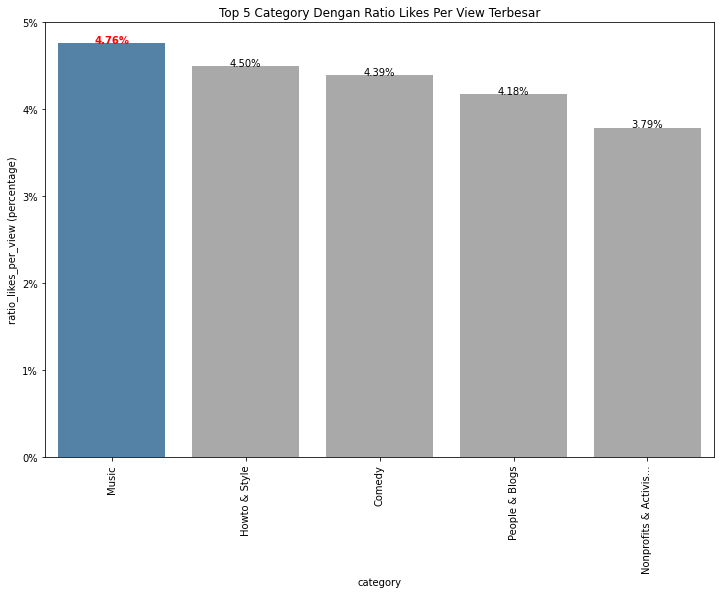

In [344]:
Top5_category_ratio_like_per_view = pd.DataFrame(df_cleaned.groupby('category')['ratio_likes_per_view (percentage)'].mean().sort_values(ascending = False).head().round(2))
colors = ['darkgrey' if v != Top5_category_ratio_like_per_view['ratio_likes_per_view (percentage)'].max() else 'steelblue' for i, v in enumerate(Top5_category_ratio_like_per_view['ratio_likes_per_view (percentage)'])]

def format_xticks(label, limit=20):
    if len(label) > limit:
        return label[:limit] + '...'
    else:
        return label
    
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=Top5_category_ratio_like_per_view, x=Top5_category_ratio_like_per_view.index, y='ratio_likes_per_view (percentage)', palette=colors)
plt.title('Top 5 Category Dengan Ratio Likes Per View Terbesar')
ax.set_xticklabels([format_xticks(label.get_text()) for label in ax.get_xticklabels()], 
                   rotation=90, fontsize=10)
ax.set_ylim(0,5)
def format_yticks(value, _):
    return '{:,.0f}%'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i, v in enumerate(Top5_category_ratio_like_per_view['ratio_likes_per_view (percentage)']):
    if v == Top5_category_ratio_like_per_view['ratio_likes_per_view (percentage)'].max():
        ax.text(i, v, f"{v:.2f}%", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v:.2f}%", ha='center')

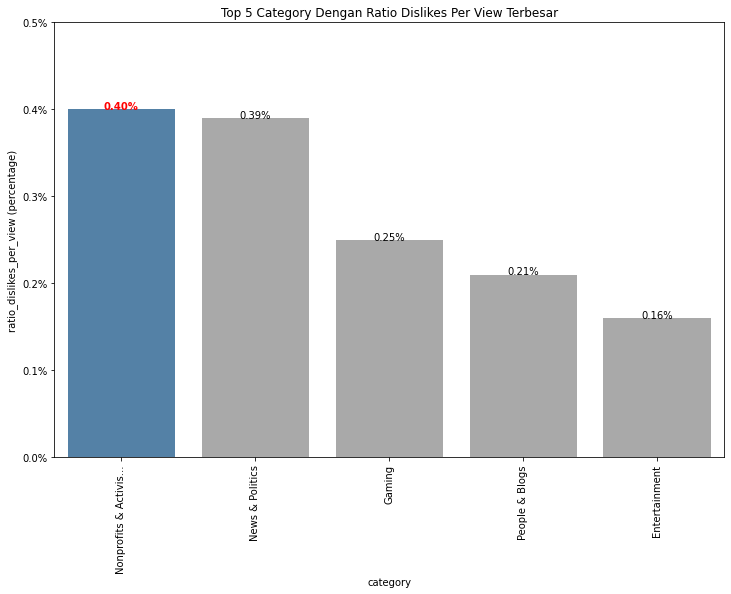

In [345]:
Top5_category_ratio_dislike_per_view = pd.DataFrame(df_cleaned.groupby('category')['ratio_dislikes_per_view (percentage)'].mean().sort_values(ascending = False).head().round(2))
colors = ['darkgrey' if v != Top5_category_ratio_dislike_per_view['ratio_dislikes_per_view (percentage)'].max() else 'steelblue' for i, v in enumerate(Top5_category_ratio_dislike_per_view['ratio_dislikes_per_view (percentage)'])]

def format_xticks(label, limit=20):
    if len(label) > limit:
        return label[:limit] + '...'
    else:
        return label
    
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=Top5_category_ratio_dislike_per_view, x=Top5_category_ratio_dislike_per_view.index, y='ratio_dislikes_per_view (percentage)', palette=colors)
plt.title('Top 5 Category Dengan Ratio Dislikes Per View Terbesar')
ax.set_xticklabels([format_xticks(label.get_text()) for label in ax.get_xticklabels()], 
                   rotation=90, fontsize=10)
ax.set_ylim(0,0.5)
def format_yticks(value, _):
    return '{:,.1f}%'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
for i, v in enumerate(Top5_category_ratio_dislike_per_view['ratio_dislikes_per_view (percentage)']):
    if v == Top5_category_ratio_dislike_per_view['ratio_dislikes_per_view (percentage)'].max():
        ax.text(i, v, f"{v:.2f}%", ha='center', color=max_color, fontweight='bold')
    else:
        ax.text(i, v, f"{v:.2f}%", ha='center')

Dari hal ini, didapatkan bahwa 5 kategori dengan ratio likes per views terbesar adalah music, howto & style, comedy, people & blogs, nonprofits & activism dan 5 kategori dengan ratio dislikes per views terbesar adalah nonprofits & activities, news & politics, gaming, people & blogs, dan entertainment. Apabila dilihat, **nilai rasio dislikes per views yang paling besar adalah 0,4 persen pada nonprofits & activism sehingga hal ini dapat dibilang cukup kecil dan tentunya sangat berbeda jauh dengan ratio dislikes per views dari daily caller (channel title dengan ratio dislikes per views terbesar) sehingga dapat dikatakan kategori tidak terlalu berpengaruh pada ratio dislikes per views**. Sedangkan untuk 5 kategori dengan ratio likes per views terbesar semuanya mendekati angka 4 % dimana **hal ini dapat dijadikan sebagai suatu dasar dalam pemilihan kategori video karena semakin tinggi ratio likes per views, maka tentunya probabilitas suatu video mendapatkan lebih banyak likes dan mampu meningkatkan reputasi suatu channel**.

# Exploratory Data Analysis Untuk Title & Tags
Hal yang perlu dijadikan catatan adalah seperti yang kita ketahui, tidak ada parameter jelas dalam pemberian judul beserta tags sehingga hal yang bisa dieksplor disini adalah bagaimana pemberian judul dan tags dari video-video yang memiliki banyak views sebagai referensi bagi content creator

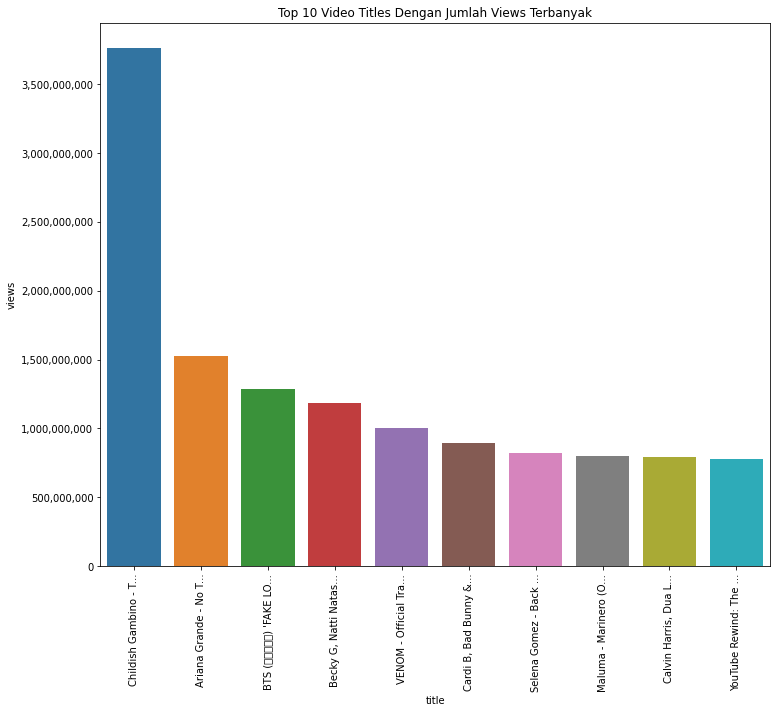

In [346]:
import matplotlib.ticker as ticker
import warnings 
warnings.filterwarnings('ignore')
def format_xticks(label, limit=20):
    if len(label) > limit:
        return label[:limit] + '...'
    else:
        return label

top10_title_views = pd.DataFrame(df_cleaned.groupby('title')['views'].sum().sort_values(ascending = False).head(10))
plt.figure(figsize = (12,10))
ax = sns.barplot(data = top10_title_views, x = top10_title_views.index, y = 'views')
ax.set_xticklabels([format_xticks(label.get_text()) for label in ax.get_xticklabels()], 
                   rotation=90, fontsize=10)
def format_yticks(value, _):
    return '{:,.0f}'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
plt.title('Top 10 Video Titles Dengan Jumlah Views Terbanyak')
plt.show()

In [347]:
top10_title_views

,views
title,
Childish Gambino - This Is America (Official Video),3758488765
Ariana Grande - No Tears Left To Cry,1529291326
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291
"Becky G, Natti Natasha - Sin Pijama (Official Video)",1182971286
VENOM - Official Trailer (HD),1003151226
"Cardi B, Bad Bunny & J Balvin - I Like It [Official Music Video]",896558471
Selena Gomez - Back To You (Lyric Video),818792483
Maluma - Marinero (Official Video),803455479
"Calvin Harris, Dua Lipa - One Kiss (Official Video)",792843004


In [348]:
top10_tags_views = pd.DataFrame(df_cleaned.groupby('tags')['views'].sum().sort_values(ascending = False).head(10))

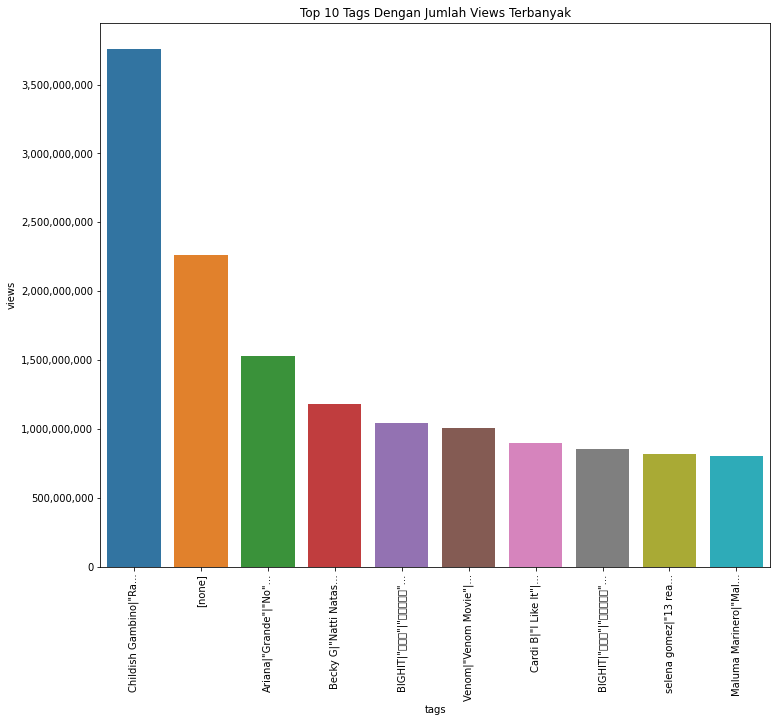

In [349]:
def format_xticks(label, limit=20):
    if len(label) > limit:
        return label[:limit] + '...'
    else:
        return label

plt.figure(figsize = (12,10))
ax = sns.barplot(data = top10_tags_views, x = top10_tags_views.index, y = 'views')
ax.set_xticklabels([format_xticks(label.get_text()) for label in ax.get_xticklabels()], 
                   rotation=90, fontsize=10)
def format_yticks(value, _):
    return '{:,.0f}'.format(value)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
plt.title('Top 10 Tags Dengan Jumlah Views Terbanyak')
plt.show()

In [350]:
top10_tags_views

,views
tags,
"Childish Gambino|""Rap""|""This Is America""|""mcDJ Recording/RCA Records""",3758488765
[none],2262567285
"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""|""Universal""|""Records""|""Pop""",1529291326
"Becky G|""Natti Natasha""|""Natti Natasha Music""|""Natti Natasha Official Video""|""Natti Natasha Video""|""Natti Natasha Video Oficial""|""Natti Natasha Nuevo Video""|""Natti Natasha New Video""|""Sin Pijama Official Video""|""Official Video""|""Sin Pijama Official Remix Video""|""Sin Pijama Single""|""Single""|""Natti Natasha New Single""|""Natti Natasha Single""|""Natti Natasha Song""|""Sin Pijama new song""|""Sin Pijama nueva canción""|""Natti Natasha nueva cancion""|""Natti""|""Natasha""|""en""",1182971286
"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAKE LOVE""|""FAKE_LOVE""|""fake love""",1042182680
"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""Marvel Comics""|""Planet of the Symbiotes""|""Eddie Brock""|""Tom Hardy""|""Ruben Fleischer""|""Spider-man""|""Spider-man: Homecoming""|""Michelle Williams""|""Jenny Slate""|""Riz Ahmed""|""Spider-man Spinoff""|""We Are Venom""|""Peter Parker""|""Sony Pictures Entertainment""|""film""|""movie""|""official""|""official venom movie trailer""|""official trailer""|""sony pictures venom""",1003151226
"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad Bunny""|""J Balvin""|""Bronx""|""New York""|""Rap""|""Hip Hop""|""Bodak Yellow""|""Bartier Cardi""|""8zSRkr1nQNw""|""Cardi""|""Bardi""",896558471
"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",854011724
"selena gomez|""13 reasons why""|""back to you""|""selena""|""gomez""|""13 reasons""|""netflix""",818792483


Satu satunya kesamaan yang dapat dilihat dari pemberian judul beserta tags dari top 10 `title` dan `tags` adalah dalam pemberian judul, selalu terdapat sebuah simbol seperti `-` `,` `:` `|` `'` `#` dan untuk pemberian tags, sebagian besar dari 10 tags dengan views terbanyak memiliki banyak tags yang diberikan dan tags yang diberikan menggambarkan hal-hal yang berkaitan dengan judul video, sehingga dapat diambil kesimpulan bahwa **pemberian simbol pada judul dan pemberian tags yang berjumlah cukup banyak berpotensi dalam mempermudah suatu video untuk dicari sehingga hal ini dapat dijadikan referensi bagi content creator**.

In [351]:
df_cleaned.to_csv('USvideos_cleaned.csv', index = False)

# Kesimpulan dan Rekomendasi
Dari analisa yang telah dilakukan, dapat ditarik sebuah kesimpulan seperti berikut :
* Kategori video yang paling banyak trending adalah entertainment yakni sebesar 24,3 % dari 40926 video yang trending di dataset ini.
* Kategori music, film & animation, nonprofits & activism, gaming, dan entertainment memiliki rata-rata views yang paling banyak dari dataset ini. 
* Kategori news & politics, education, pets & animals, travel & events, dan shows memiliki rata-rata views yang paling sedikit dari dataset ini.
* Kategori nonprofits & activism, music, gaming, film & animation, dan comedy merupakan 5 kategori yang memiliki rata-rata like terbesar dari dataset ini.
* Kategori nonprofits & activism, gaming, music, entertainment, dan people & blogs merupakan 5 kategori yang memiliki rata-rata dislike terbesar dari dataset ini.
* Ditemukan bahwa persentase like per views adalah 3,15 % dan persentase dislike per views adalah 0,16 % dimana `views`, `likes`, dan `dislikes` memiliki hubungan berbentuk korelasi positif antara satu sama lain.
* Waktu rata-rata yang dibutuhkan sebuah video untuk trending adalah 17 hari.
* Kategori comedy, howto & style, nonprofits & activism, pets & animals, dan travel & events memiliki waktu rata-rata tercepat untuk trending. Dari kelima kategori tersebut, kategori nonprofits & activism memiliki waktu rata-rata tercepat untuk trending yakni 5 hari.
* Berdasarkan uji mann whitney, pemberian description pada video mempengaruhi jumlah views yang dapat diperoleh dimana rata-rata views yang lebih besar didapatkan pada video yang memiliki description.
* Pengambilan nama untuk `channel_title` tersebut tidak terlalu berpengaruh terhadap jumlah views, likes, ataupun dislikes namun yang berpengaruh adalah bagaimana reputasi channel yang telah dibangun. Channel yang memiliki rasio likes per views terbesar adalah Desimpedidos dengan nilai 20,45 % dan channel yang memiliki rasio dislikes per views adalah Daily Caller dengan nilai 19,04 %.
* 5 kategori dengan ratio likes per views terbesar adalah music, howto & style, comedy, people & blogs, nonprofits & activism.
* 5 kategori dengan ratio dislikes per views terbesar adalah nonprofits & activities, news & politics, gaming, people & blogs, dan entertainment.
* Pemberian simbol pada judul dan pemberian tags yang berjumlah cukup banyak berpotensi dalam mempermudah suatu video untuk dicari dikarenakan pada top 10 `title` dan `tags` dengan views terbesar, selalu terdapat sebuah simbol seperti `-` `,` `:` `|` `'` `#` dan untuk pemberian tags, sebagian besar dari 10 tags dengan views terbesar memiliki banyak tags yang diberikan dan tags yang diberikan menggambarkan hal-hal yang berkaitan dengan judul video.

**Rekomendasi**
1. Jadikan jumlah views sebagai fokus utama dikarenakan telah terbukti bahwa rasio like per views adalah 3,15 % dan juga terlihat dari hubungan korelasi bahwa semakin banyak views yang diperoleh, jumlah likes yang didapat juga akan meningkat lebih besar dibandingkan jumlah dislikes yang meningkat.
2. Pilihlah salah satu kategori dari kategori music, film & animation, nonprofits & activism, gaming, dan entertainment karena kelima kategori ini memiliki rata-rata views yang paling banyak dimana kategori yang lebih disarankan dari lima kategori tersebut adalah **music dan nonprofits & activities berhubung kedua kategori ini juga termasuk dalam list 5 kategori dengan ratio likes per views terbesar**.
    * Apabila content creator ingin video yang dibuat juga cepat trending, maka pilihlah kategori nonprofits & activism karena kategori ini termasuk dari 5 kategori dengan rata-rata views yang paling banyak dan ratio likes per views terbesar dimana kategori ini juga memiliki **waktu rata-rata tercepat untuk trending yakni 5 hari**.
3. Berikan description pada video yang diupload karena telah terbukti bahwa pemberian description pada video mempengaruhi jumlah views yang dapat diperoleh.
4. Jangan terlalu fokus pada pemberian nama untuk judul channel karena nama dari channel tidak berpengaruh terhadap jumlah views, likes, ataupun dislikes namun yang berpengaruh adalah bagaimana reputasi channel yang telah dibangun sehingga utamakan hal tersebut.
    * Jadikan rasio like per views dan dislike per views dari video yang diupload sebagai patokan untuk melihat apakah video tersebut meningkatkan atau menurunkan reputasi channel anda.
5. Tambahkan simbol seperti `-` `,` `:` `|` `'` `#` pada judul video dan juga berikan banyak tags pada video dimana tags yang diberikan diusahakan dapat menggambarkan hal-hal yang berkaitan dengan judul video tersebut karena kedua hal ini berpotensi untuk mempermudah video yang diupload untuk dicari.